https://www.cs.cornell.edu/projects/kddcup/datasets.html

# identify equations in Latex

options: 
* regex
* http://plastex.sourceforge.net/plastex/sect0025.html
* tex2py
* texsoup

### load libraries

In [1]:
# https://github.com/alvinwan/tex2py
!pip install tex2py

In [2]:
# https://github.com/alvinwan/TexSoup
!pip install texsoup

In [3]:
!pip install plastex

In [4]:
import re
import time
import pickle # https://docs.python.org/3/library/pickle.html
import glob
import matplotlib.pyplot as plt

### load data

In [5]:
list_of_files = glob.glob('hep-th/2003/*')

In [6]:
len(list_of_files)

1019

# find relevant tags for equations in latex using regex

regex likely won't work for complex latex equations. 

regex will have trouble with inline math like \\$x\\$

In [7]:
start_time=time.time()
reslts={}
number_of_eq=0
for this_file in list_of_files:
    with open(this_file,'rb') as f:
        data = f.read()
    
    resp = re.findall('\\\\begin{(?:eqnarray|equation|multiline)}.*?end{(?:eqnarray|equation|multiline)}',str(data),re.DOTALL)
#    print(this_file)
    for eq in resp:
        number_of_eq+=1
        try:
            reslts[this_file].append(eq)
        except KeyError:
            reslts[this_file]=[]
            reslts[this_file].append(eq)
#        print('  ',eq,'\n')

print(round(time.time()-start_time,2),'seconds')

6.25 seconds


How many equations were found?

In [8]:
number_of_eq

29481

Of the files, how many have equations present?

In [9]:
print(len(reslts.keys()),"files have equations")
print(len(list_of_files),"files")

929 files have equations
1019 files


what is an example of equations found in the first paper?

In [10]:
reslts[list(reslts.keys())[0]]

['\\begin{equation}}\\n\\\\newcommand{\\\\eeq}{\\\\end{equation}',
 '\\begin{eqnarray}}\\n\\\\newcommand{\\\\eeqa}{\\\\end{eqnarray}']

What is the first equation in the second paper?

In [11]:
reslts[list(reslts.keys())[1]][0]

'\\begin{equation} \\\\eqalign{#2} \\\\label{#1} \\\\end{equation}'

## visualize results

In [12]:
number_of_eq_per_file=[]
for k,v in reslts.items():
    number_of_eq_per_file.append(len(v))

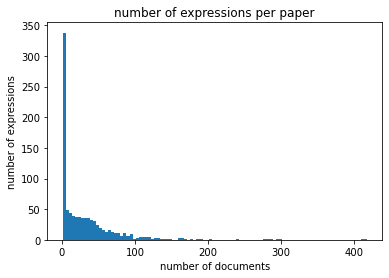

In [13]:
_=plt.hist(number_of_eq_per_file,bins=100)
_=plt.ylabel('number of expressions')
_=plt.xlabel('number of documents')
_=plt.title("number of expressions per paper")

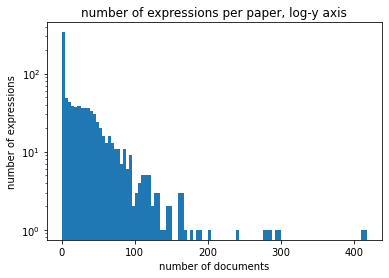

In [14]:
_=plt.hist(number_of_eq_per_file,bins=100)
_=plt.yscale('log', nonpositive='clip')
_=plt.ylabel('number of expressions')
_=plt.xlabel('number of documents')
_=plt.title("number of expressions per paper, log-y axis")

## plastex

http://plastex.sourceforge.net/plastex/sect0025.html

http://plastex.sourceforge.net/plastex/index.html

http://plastex.github.io/plastex/

In [15]:
from plasTeX.TeX import TeX
from plasTeX.Renderers.XHTML import Renderer

In [16]:
with open(list_of_files[1]) as f: data = f.read()

In [17]:
TeX(data)

## tex2py

Tex2py converts LaTeX into a Python parse tree.

`tex2py` uses `TexSoup` on the backend

In [18]:
# https://github.com/alvinwan/tex2py
from tex2py import tex2py

In [19]:
list_of_files[2]

'hep-th/2003/0301003'

In [20]:
with open(list_of_files[1]) as f: data = f.read()
toc = tex2py(data)

In [21]:
toc.branches

[Introduction,
 Thermodynamic considerations,
 Universality classes and the general problem,
 Crossing the threshold of stability: non-dilatonic\\ branes,
 Conclusions]

Not clear to me how to extract equations from the parse tree

## TexSoup

https://github.com/alvinwan/TexSoup

https://texsoup.alvinwan.com/docs/navigation.html

In [22]:
from TexSoup import TexSoup

### single file

In [23]:
file_to_open = list_of_files[3]
print(file_to_open)

hep-th/2003/0301004


https://arxiv.org/abs/hep-th/0301004

In [24]:
with open(file_to_open) as f: data = f.read()

In [25]:
soup = TexSoup(data)

In [26]:
list_of_math_entries = []
for entry in soup.find_all("$"):
    for this in entry.contents:
        #print(this)
        list_of_math_entries.append(this)

In [27]:
soup.equation

\begin{equation}
 \rho_N^D = \left(\prod_{i=1}^N\int d\Omega_{p_i}\right)(2\pi)^D\delta^D
 (p-\sum_{i=1}^N p_i)
\end{equation}

In [28]:
lst = list(soup.find_all('equation'))

In [29]:
len(lst) # how many equations are in the document?

22

In [30]:
lst[0] # show the first match

\begin{equation}
 \rho_N^D = \left(\prod_{i=1}^N\int d\Omega_{p_i}\right)(2\pi)^D\delta^D
 (p-\sum_{i=1}^N p_i)
\end{equation}

In [31]:
lst[0][0] # what is the string inside the "begin{equation}"?

'\n \\rho_N^D = \\left(\\prod_{i=1}^N\\int d\\Omega_{p_i}\\right)(2\\pi)^D\\delta^D\n (p-\\sum_{i=1}^N p_i)\n'

In [32]:
lst[1]

\begin{equation}
 \Phi({\bf{x}},y)=\sum_{k=-\infty}^\infty \phi_k({\bf{x}})
 \exp(iky/R)/\sqrt{2\pi R}; \quad \phi_k^*({\bf{x}}) = \phi_{-k}({\bf{x}}).
\end{equation}

In [33]:
lst[1][0]

'\n \\Phi({\\bf{x}},y)=\\sum_{k=-\\infty}^\\infty \\phi_k({\\bf{x}})\n \\exp(iky/R)/\\sqrt{2\\pi R}; \\quad \\phi_k^*({\\bf{x}}) = \\phi_{-k}({\\bf{x}}).\n'

### loop over files

In [ ]:
start_time = time.time()

list_of_dicts = []

error_counts = {"decode errors": [],
                "Type Error": [],
                "EOF Error": []}

for file_to_open in list_of_files:
    
    try:
        with open(file_to_open,'r') as file_handle: 
            data = file_handle.read()
    except UnicodeDecodeError:
        print("\nunable to decode using utf-8:", file_to_open)
        # https://stackoverflow.com/questions/19699367/for-line-in-results-in-unicodedecodeerror-utf-8-codec-cant-decode-byte
        error_counts["decode errors"].append(file_to_open)
        continue # skip remaining code and go to next iteration of loop
        
    try:
        soup = TexSoup(data)
    except TypeError as err:
        print("\nTypeError non-renderable file:",file_to_open)
        error_counts["Type Error"].append(file_to_open)
        print(str(err)[0:300]) # sometimes the error message can include the entire document, so here I limit the output to the first 200 characters
        continue # skip remaining code and go to next iteration of loop
    except EOFError as err:
        print("\nEOFError non-renderable file:",file_to_open)
        error_counts["EOF Error"].append(file_to_open)
        print(str(err)[0:300]) # sometimes the error message can include the entire document, so here I limit the output to the first 200 characters
        continue # skip remaining code and go to next iteration of loop
    
    this_article = {"file name": file_to_open}
    
    list_of_math_entries = []
    for entry in soup.find_all("$"):
        for this in entry.contents:
            #print(this)
            list_of_math_entries.append(this)
    this_article["list of math entries"] = list_of_math_entries

    list_of_equations = []
    for entry in soup.find_all('equation'):
        for this in entry:
            list_of_equations.append(this)
            
    this_article["list of equations"] = list_of_equations
    
    list_of_dicts.append(this_article)
            
print(round(time.time()-start_time,2),'seconds')


TypeError non-renderable file: hep-th/2003/0301001
Malformed argument. First and last elements must match a valid argument format. In this case, TexSoup could not find matching punctuation for: ['[', '\\mu', '}'].
Common issues include: Unescaped special characters, mistyped closing punctuation, misalignment.

TypeError non-renderable file: hep-th/2003/0301003
Malformed argument. First and last elements must match a valid argument format. In this case, TexSoup could not find matching punctuation for: ['[', '}'].
Common issues include: Unescaped special characters, mistyped closing punctuation, misalignment.

TypeError non-renderable file: hep-th/2003/0301006
Malformed argument. First and last elements must match a valid argument format. In this case, TexSoup could not find matching punctuation for: ['{', '\\right}', '\n', '\\def', '\\da', RArg(RArg('\\dot', '\\alpha')), '\n', '\\def', '\\mapr', RArg('\\mathop', RArg('\\longrightarrow'), '\\limits'), '\n

TypeError non-renderable file:

In [ ]:
len(list_of_dicts)

In [ ]:
# https://wiki.python.org/moin/UsingPickle

pickle.dump( list_of_dicts, open( "all_math_and_equations.pkl", "wb" ) )